In [181]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
import math

In [182]:
font1 = {'family': 'Times New Roman',
             'weight': 'normal',
             'size': 25,
             }

df = pd.read_csv("../output/COVID_final.csv")

df = df[['id', 'location','rh_mean', 'rh_max', 'rh_min', 't2m_mean', 't2m_max', 't2m_min',
         'confirmed',
         'moveIn_index_mean', 'moveIn_index_max', 'moveIn_index_min',
         'moveOut_index_mean', 'moveOut_index_max', 'moveOut_index_min',
         'travel_index_mean', 'travel_index_max', 'travel_index_min',
         '420100_moveIn_mean', '420100_moveIn_max', '420100_moveIn_min', 'npp']]
df = df[~df['id'].isin(['371200', '710000'])]
feature = ['rh_mean', 'rh_max', 'rh_min', 
           't2m_mean', 't2m_max', 't2m_min',
           'moveIn_index_mean', 'moveIn_index_max', 'moveIn_index_min',
           'moveOut_index_mean', 'moveOut_index_max', 'moveOut_index_min',
          'travel_index_mean', 'travel_index_max', 'travel_index_min',
           '420100_moveIn_mean', '420100_moveIn_max', '420100_moveIn_min', 
           'npp']

df

In [183]:
# 全国所有城市的自变量和确诊人数关系分析，计算了R值。

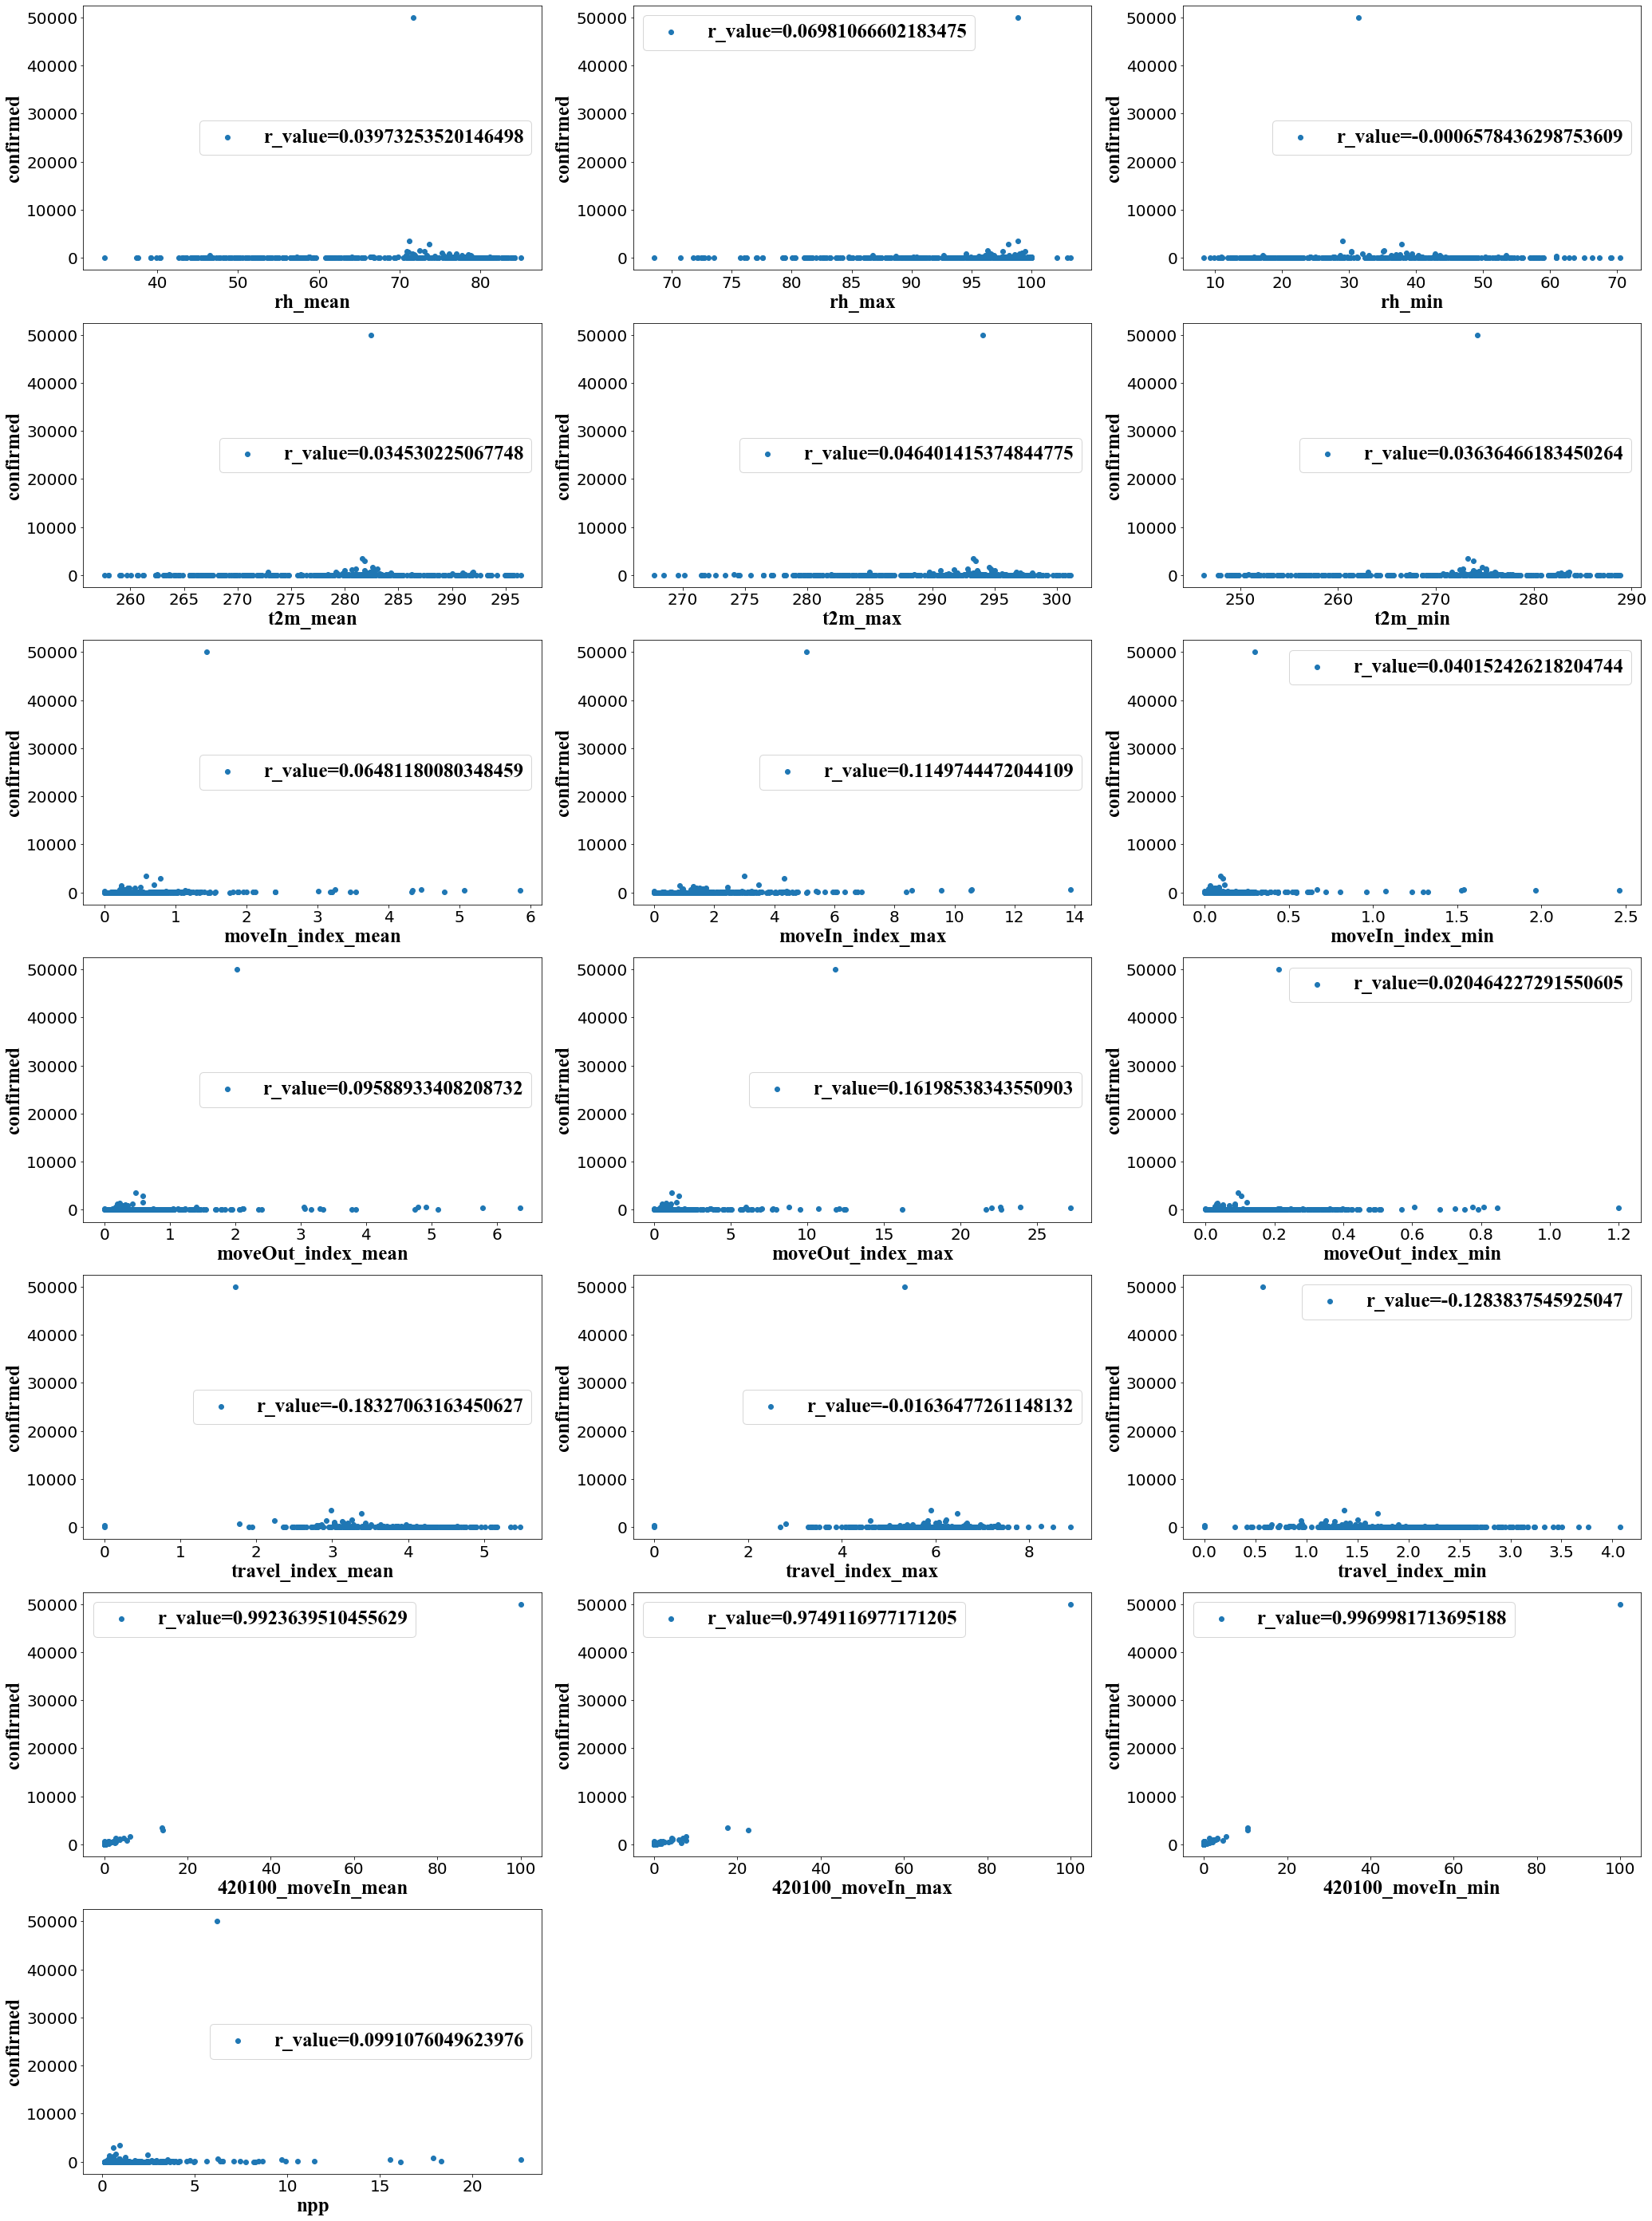

In [184]:
figsize = 35,50
plt.figure(figsize=figsize)
for i in range(len(feature)):
    plt.subplot(7,3,1+i)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[feature[i]], df['confirmed'])
    plt.scatter(df[feature[i]], df['confirmed'], label='r_value=' + str(r_value))
    plt.xlabel(feature[i], font1)
    plt.ylabel('confirmed', font1)
    plt.legend(prop=font1)  # 图例
    plt.tick_params(labelsize=20)

In [185]:
# 结论：
# 1. 420100_moveIn_mean、420200_moveIn_max、420200_moveIn_min与确诊人数的R达到0.9以上，说明武汉的人口迁出对疫情的影响至关重要
# 2. 其他变量的R值非常低，rh和t2m很多数据点几乎与x轴平行

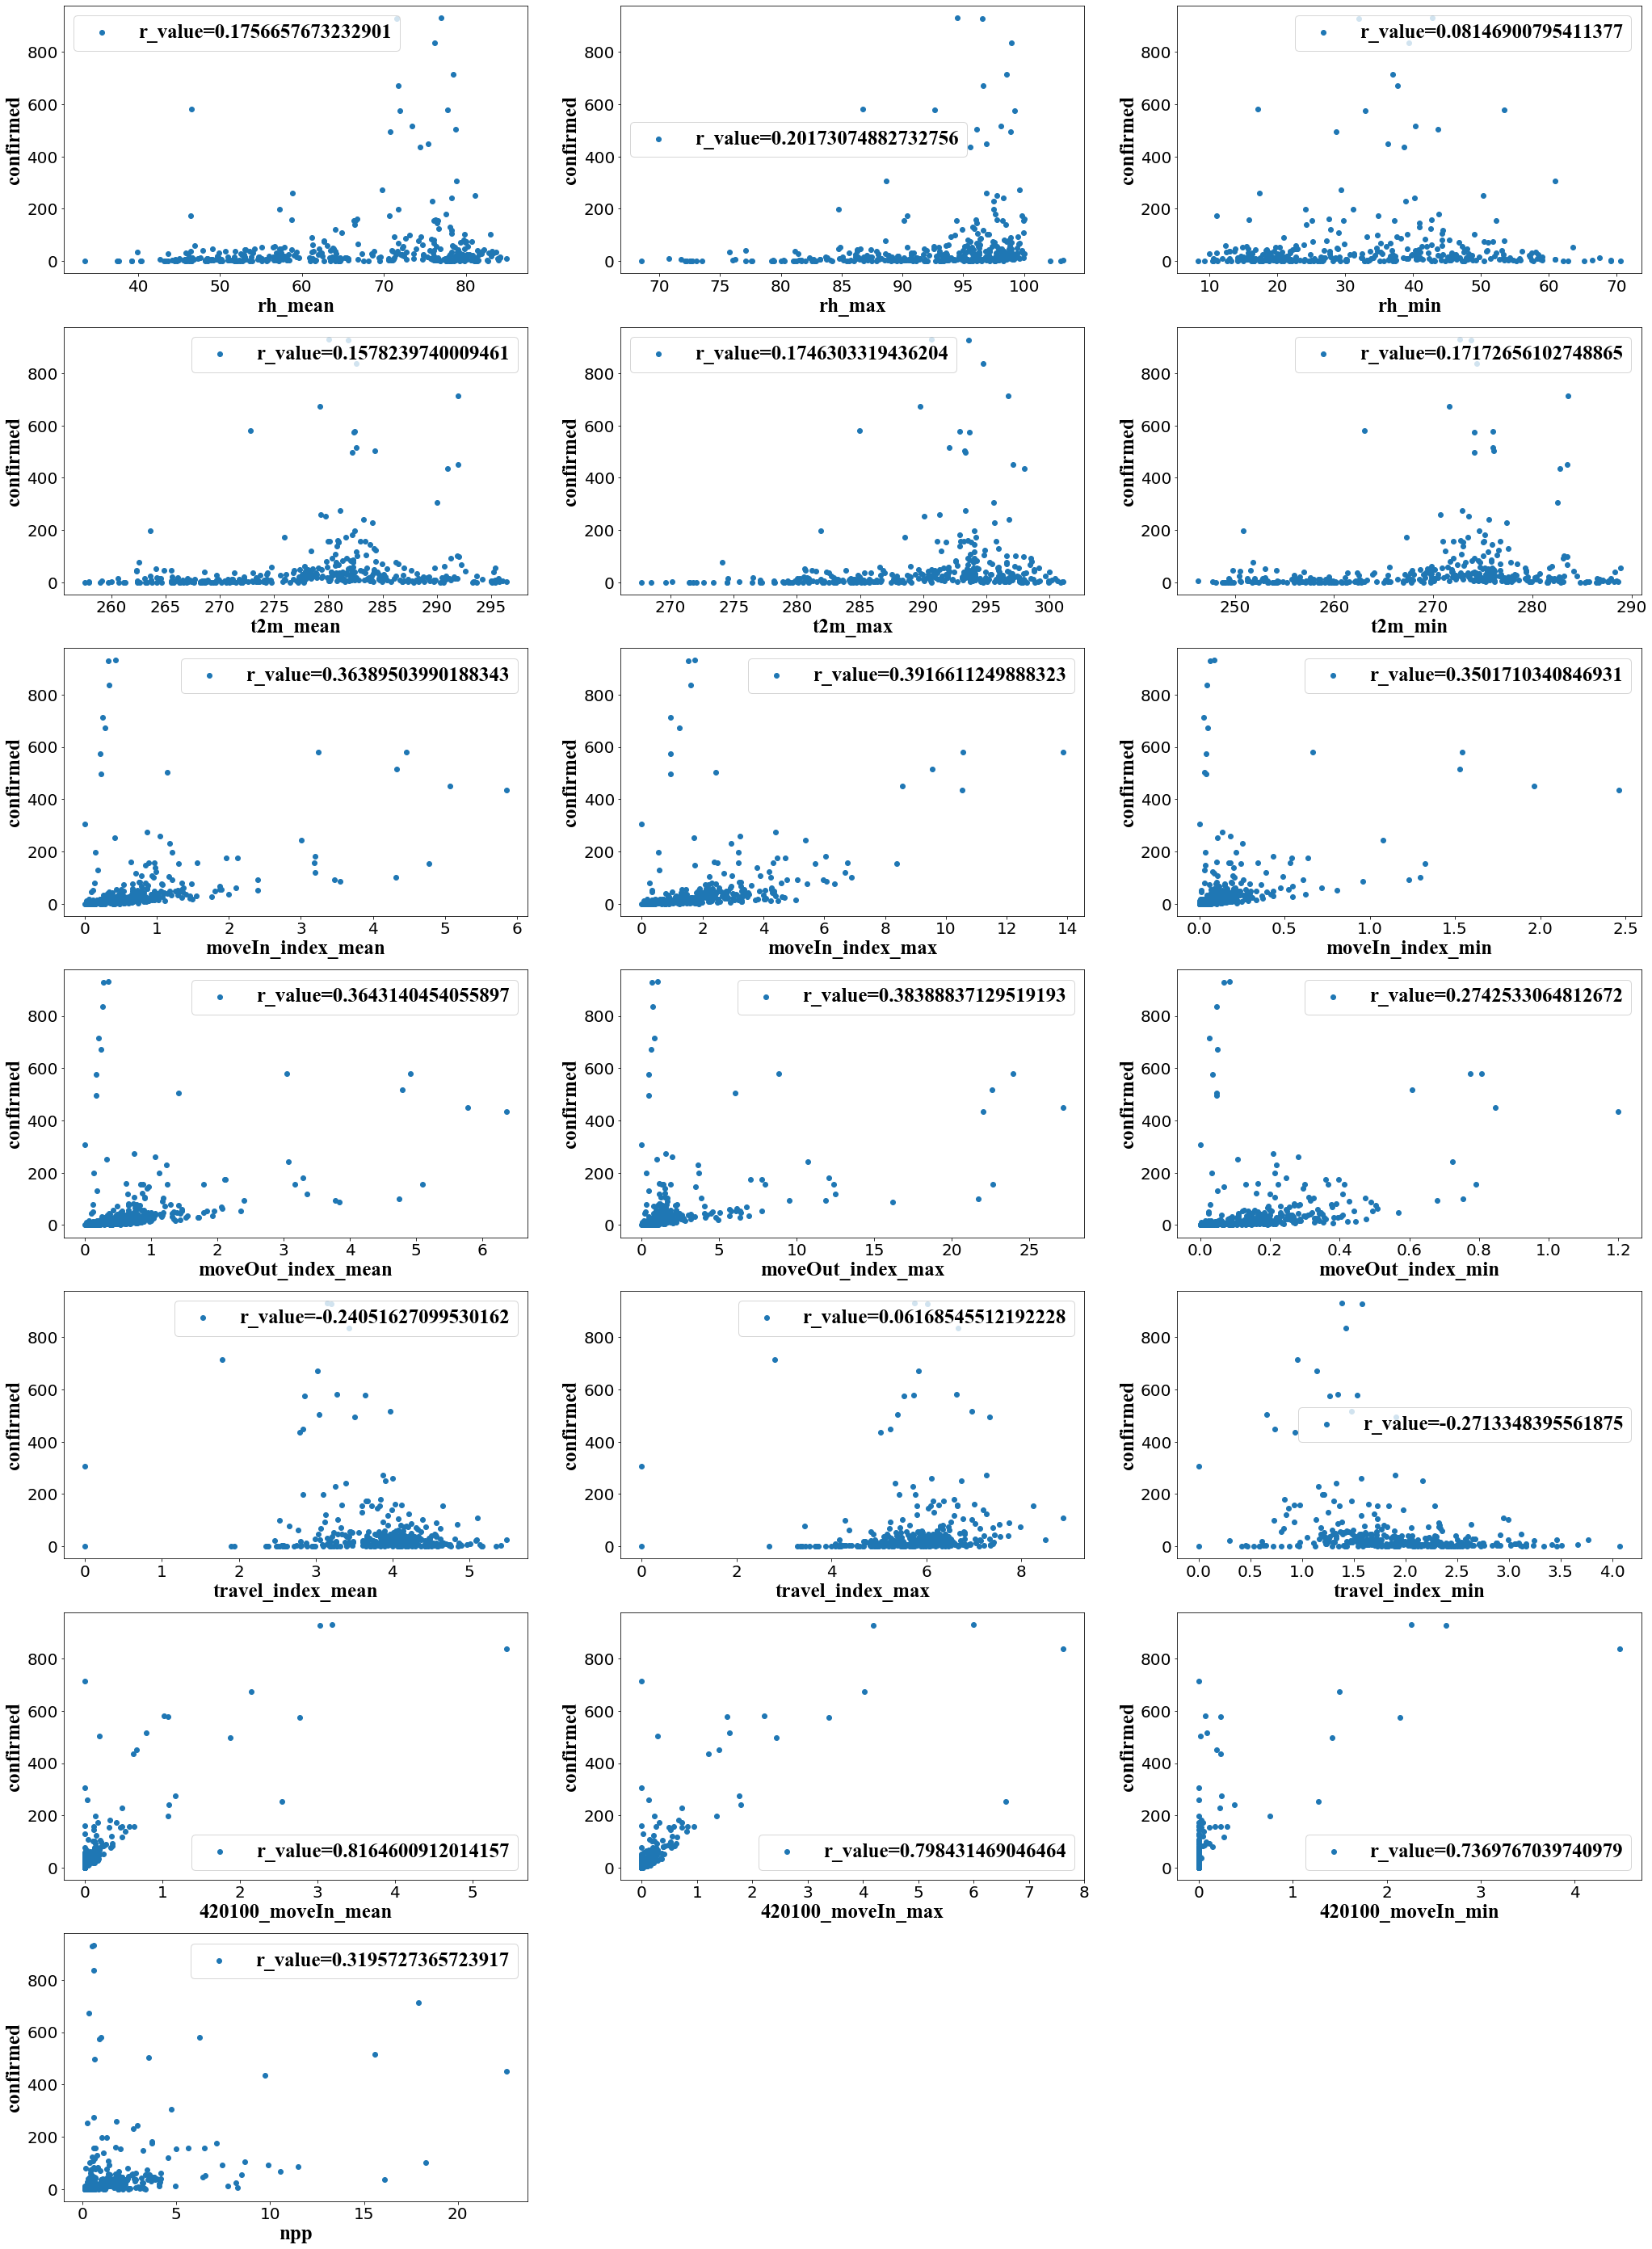

In [186]:
#   选取了确诊人数在1000以下的城市，查看了自变量与确诊人数的关系，相关系数R有所提高，但也很低
df1 = df[df['confirmed']<1000]
figsize = 35,50
plt.figure(figsize=figsize)
for i in range(len(feature)):
    plt.subplot(7,3,1+i)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df1[feature[i]], df1['confirmed'])
    plt.scatter(df1[feature[i]], df1['confirmed'], label='r_value=' + str(r_value))
    plt.xlabel(feature[i], font1)
    plt.ylabel('confirmed', font1)
    plt.legend(prop=font1)  # 图例
    plt.tick_params(labelsize=20)

In [187]:
#   筛选确诊人数为0的城市看了一下，这些城市的rh和t2m范围分布跨度较大，最南面——海南，北面——内蒙古，西面——新疆、甘肃，东面-山东等等，地理位置的差异，这几个城市的气温和相对湿度也有差异。
#   另外，era5的分辨率默认是0.25°，很粗，可能对地级市空间异质性的气候变量的表达缺乏很好的表征。
df[df['confirmed']==0]

,id,location,rh_mean,rh_max,rh_min,t2m_mean,t2m_max,t2m_min,confirmed,moveIn_index_mean,...,moveOut_index_mean,moveOut_index_max,moveOut_index_min,travel_index_mean,travel_index_max,travel_index_min,420100_moveIn_mean,420100_moveIn_max,420100_moveIn_min,npp
35,152900,阿拉善盟,37.460076,77.130896,10.485974,271.454380,285.738000,260.741708,0,0.138973,...,0.127751,0.282982,0.019537,4.200933,5.7514,2.3617,0.000000,0.00,0.0,0.313230
39,210400,抚顺市,53.614253,93.166404,22.659013,268.328880,282.521375,253.800333,0,0.276351,...,0.287769,0.571050,0.081130,4.171141,5.5384,2.2454,0.000000,0.00,0.0,1.130660
55,220600,白山市,64.456539,90.877408,26.230492,264.605360,279.024083,248.041625,0,0.100141,...,0.105081,0.250776,0.021967,3.844088,5.3060,1.8043,0.000000,0.00,0.0,0.452778
137,370500,东营市,53.890602,97.186767,17.651060,277.743397,290.667625,269.730083,0,0.391314,...,0.407123,1.057439,0.068008,5.171726,6.8429,2.5932,0.000000,0.00,0.0,2.428600
144,371200,莱芜市,62.637502,98.269675,24.645800,277.195260,288.460250,269.016958,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.00,0.0,1.896600
219,445300,云浮市,78.229968,95.574825,47.270446,290.574102,297.849458,281.515250,0,0.478476,...,0.395164,0.607727,0.146869,3.997597,5.2076,2.7247,0.000000,0.00,0.0,0.836622
233,451400,崇左市,81.466374,97.537413,47.484579,290.304263,297.722167,282.860583,0,0.386464,...,0.387383,0.963997,0.091951,4.297804,6.0758,2.4089,0.000000,0.00,0.0,0.405438
237,469001,五指山市,79.889544,96.126750,69.150208,293.308375,298.180250,284.781417,0,0.038218,...,0.041080,0.102190,0.009234,3.407967,4.5801,2.1485,0.000000,0.00,0.0,0.262019
243,469022,屯昌县,78.056228,91.142750,62.098121,295.374832,300.870125,286.682167,0,0.076877,...,0.072852,0.132224,0.023944,4.467760,6.4619,3.1276,0.000000,0.00,0.0,0.241374
246,469025,白沙黎族自治县,77.570953,92.037604,62.859008,295.069311,299.949375,286.450875,0,0.041509,...,0.043657,0.087804,0.010400,4.591907,5.9801,3.3353,0.000000,0.00,0.0,0.236464


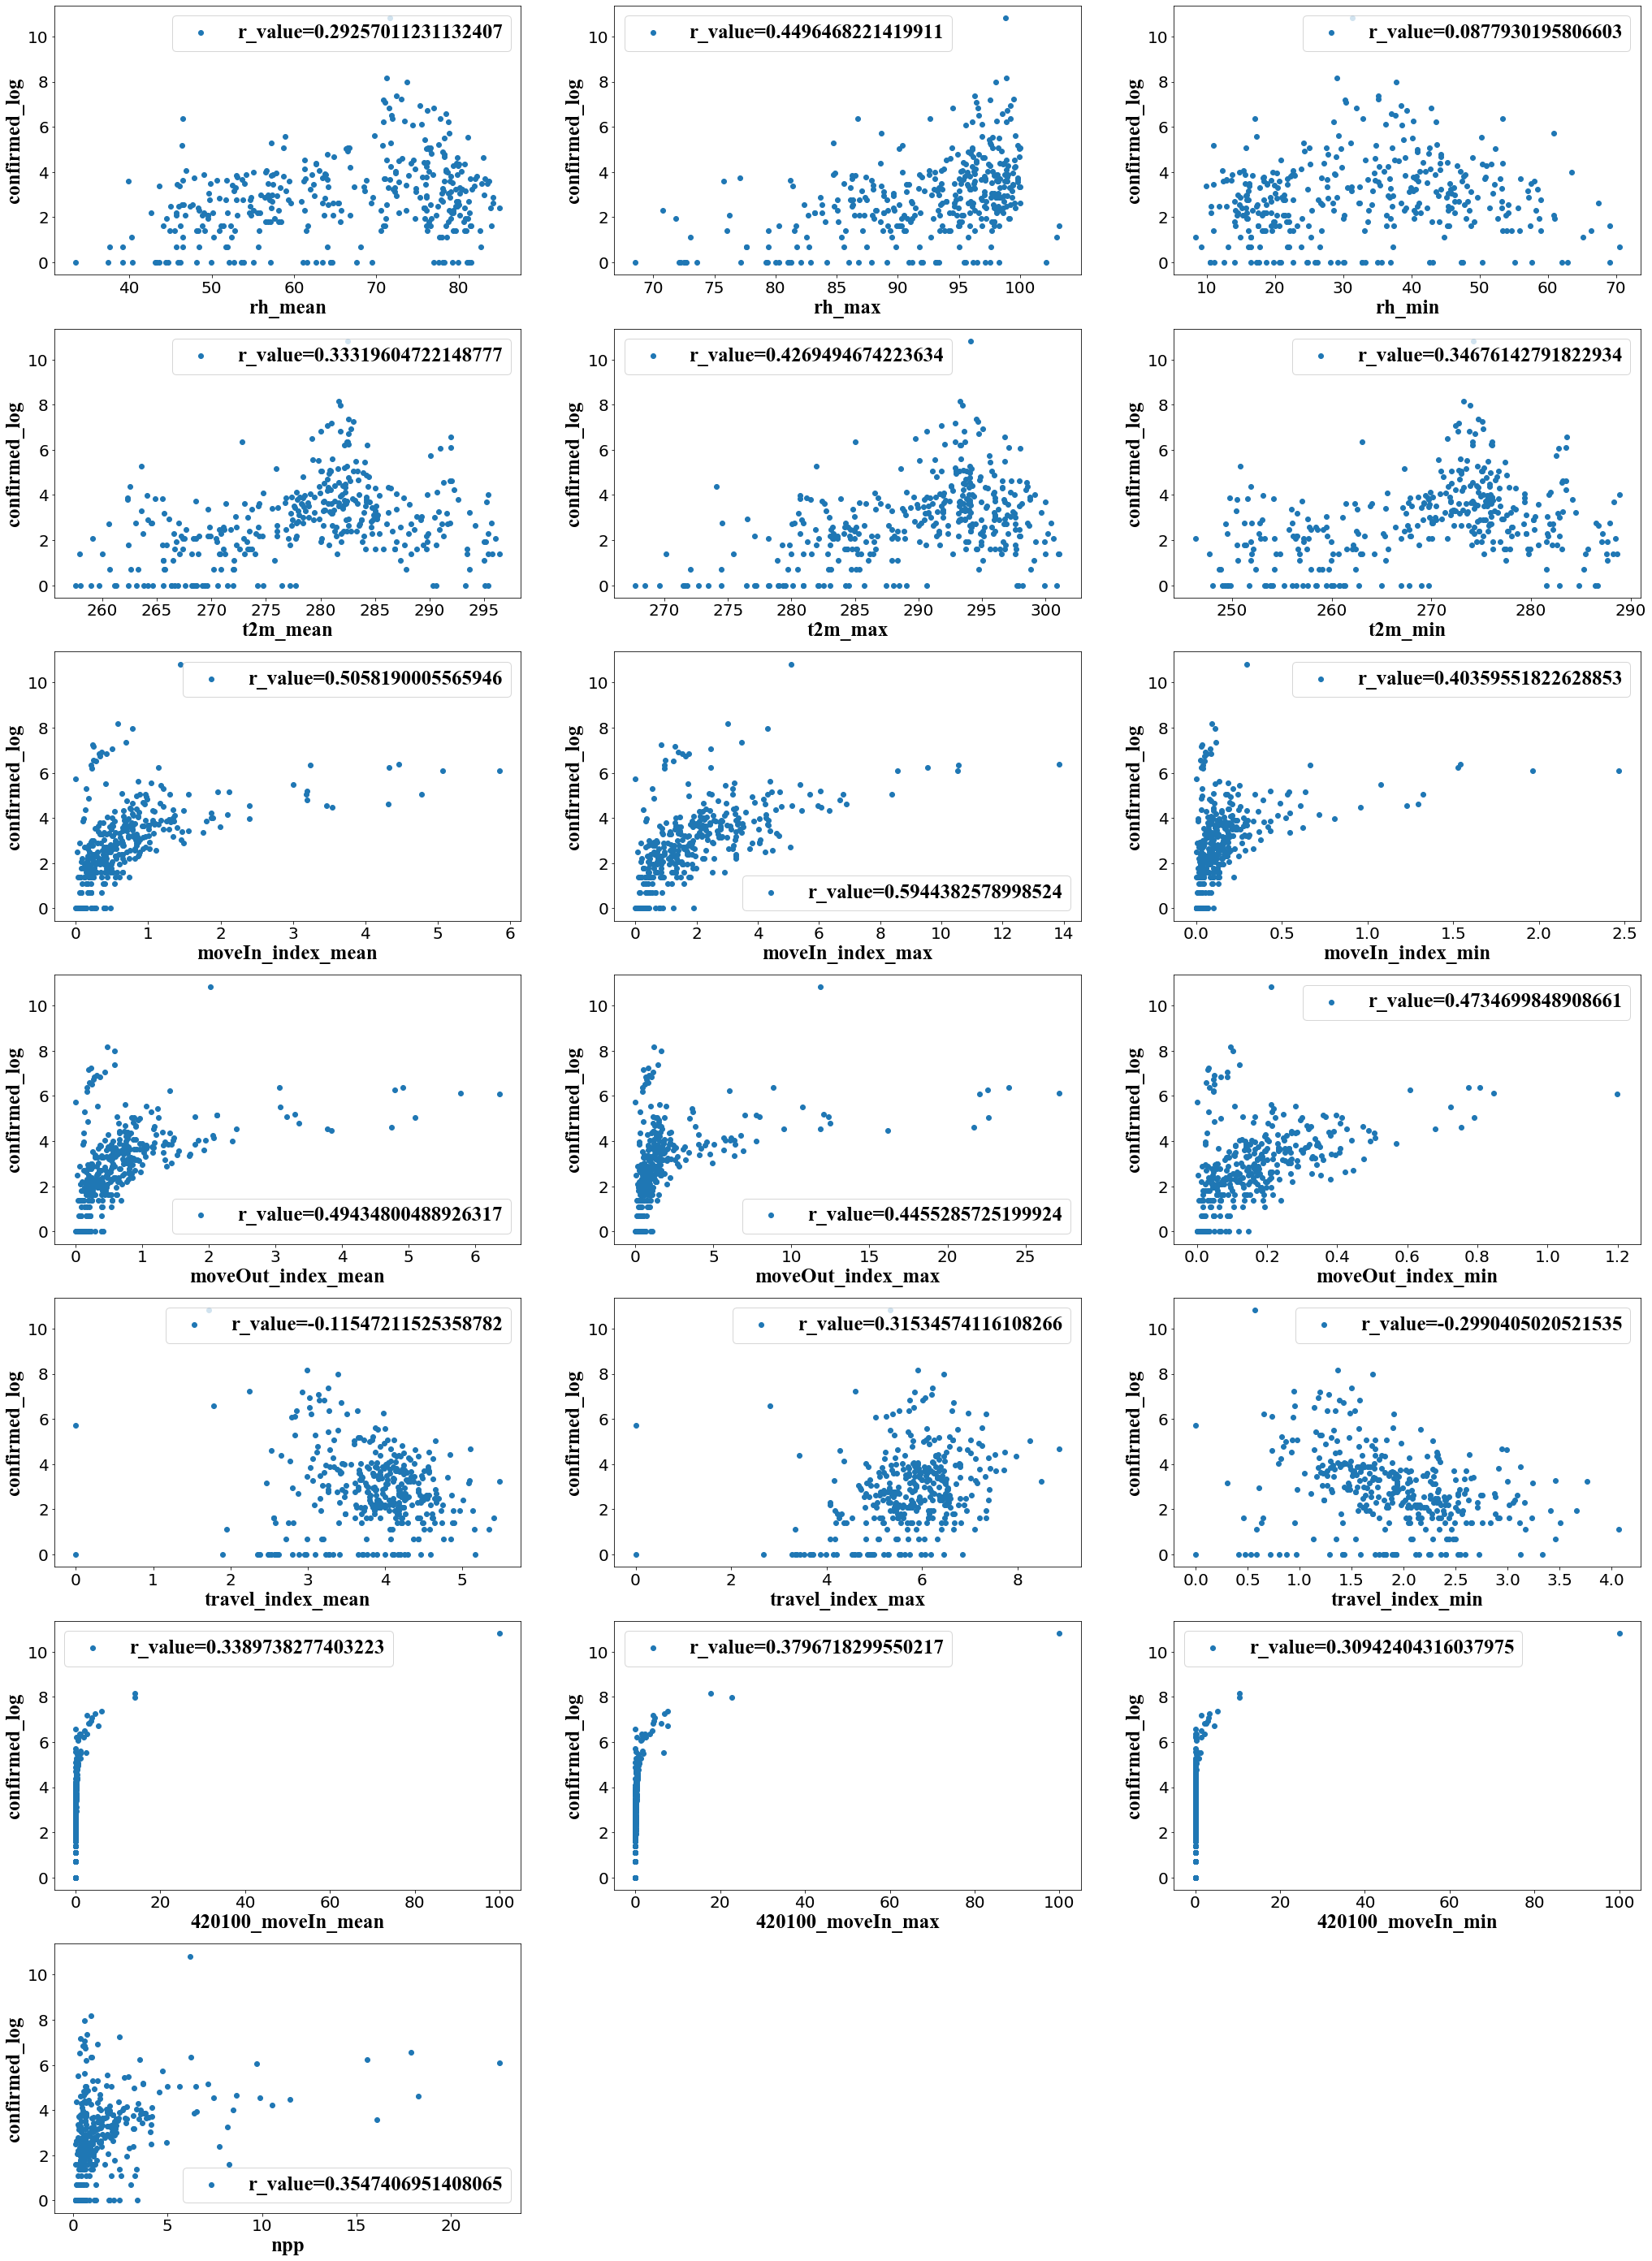

In [188]:
# 对确诊人数做log处理
# 结论：
# 1. 420100_moveIn_mean、420200_moveIn_max、420200_moveIn_min与确诊人数的R下降到0.4以下
# 2. 其他变量的R值有所提高，不过依旧存在很多数据与x轴平行的情况，主要还是一些城市确诊人数相近，但是特征跨度较大；
#   另外，log处理后，高值区label被平滑的很厉害

confirmed = df['confirmed'].to_list()
confirmed = [math.log(i+1) for i in confirmed]
df.loc[:, 'confirmed_log'] = confirmed
figsize = 35,50
plt.figure(figsize=figsize)
for i in range(len(feature)):
    plt.subplot(7,3,1+i)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[feature[i]], df['confirmed_log'])
    plt.scatter(df[feature[i]], df['confirmed_log'], label='r_value=' + str(r_value))
    plt.xlabel(feature[i], font1)
    plt.ylabel('confirmed_log', font1)
    plt.legend(prop=font1)  # 图例
    plt.tick_params(labelsize=20)

In [191]:
# 除武汉外所有城市的自变量和确诊人数关系分析

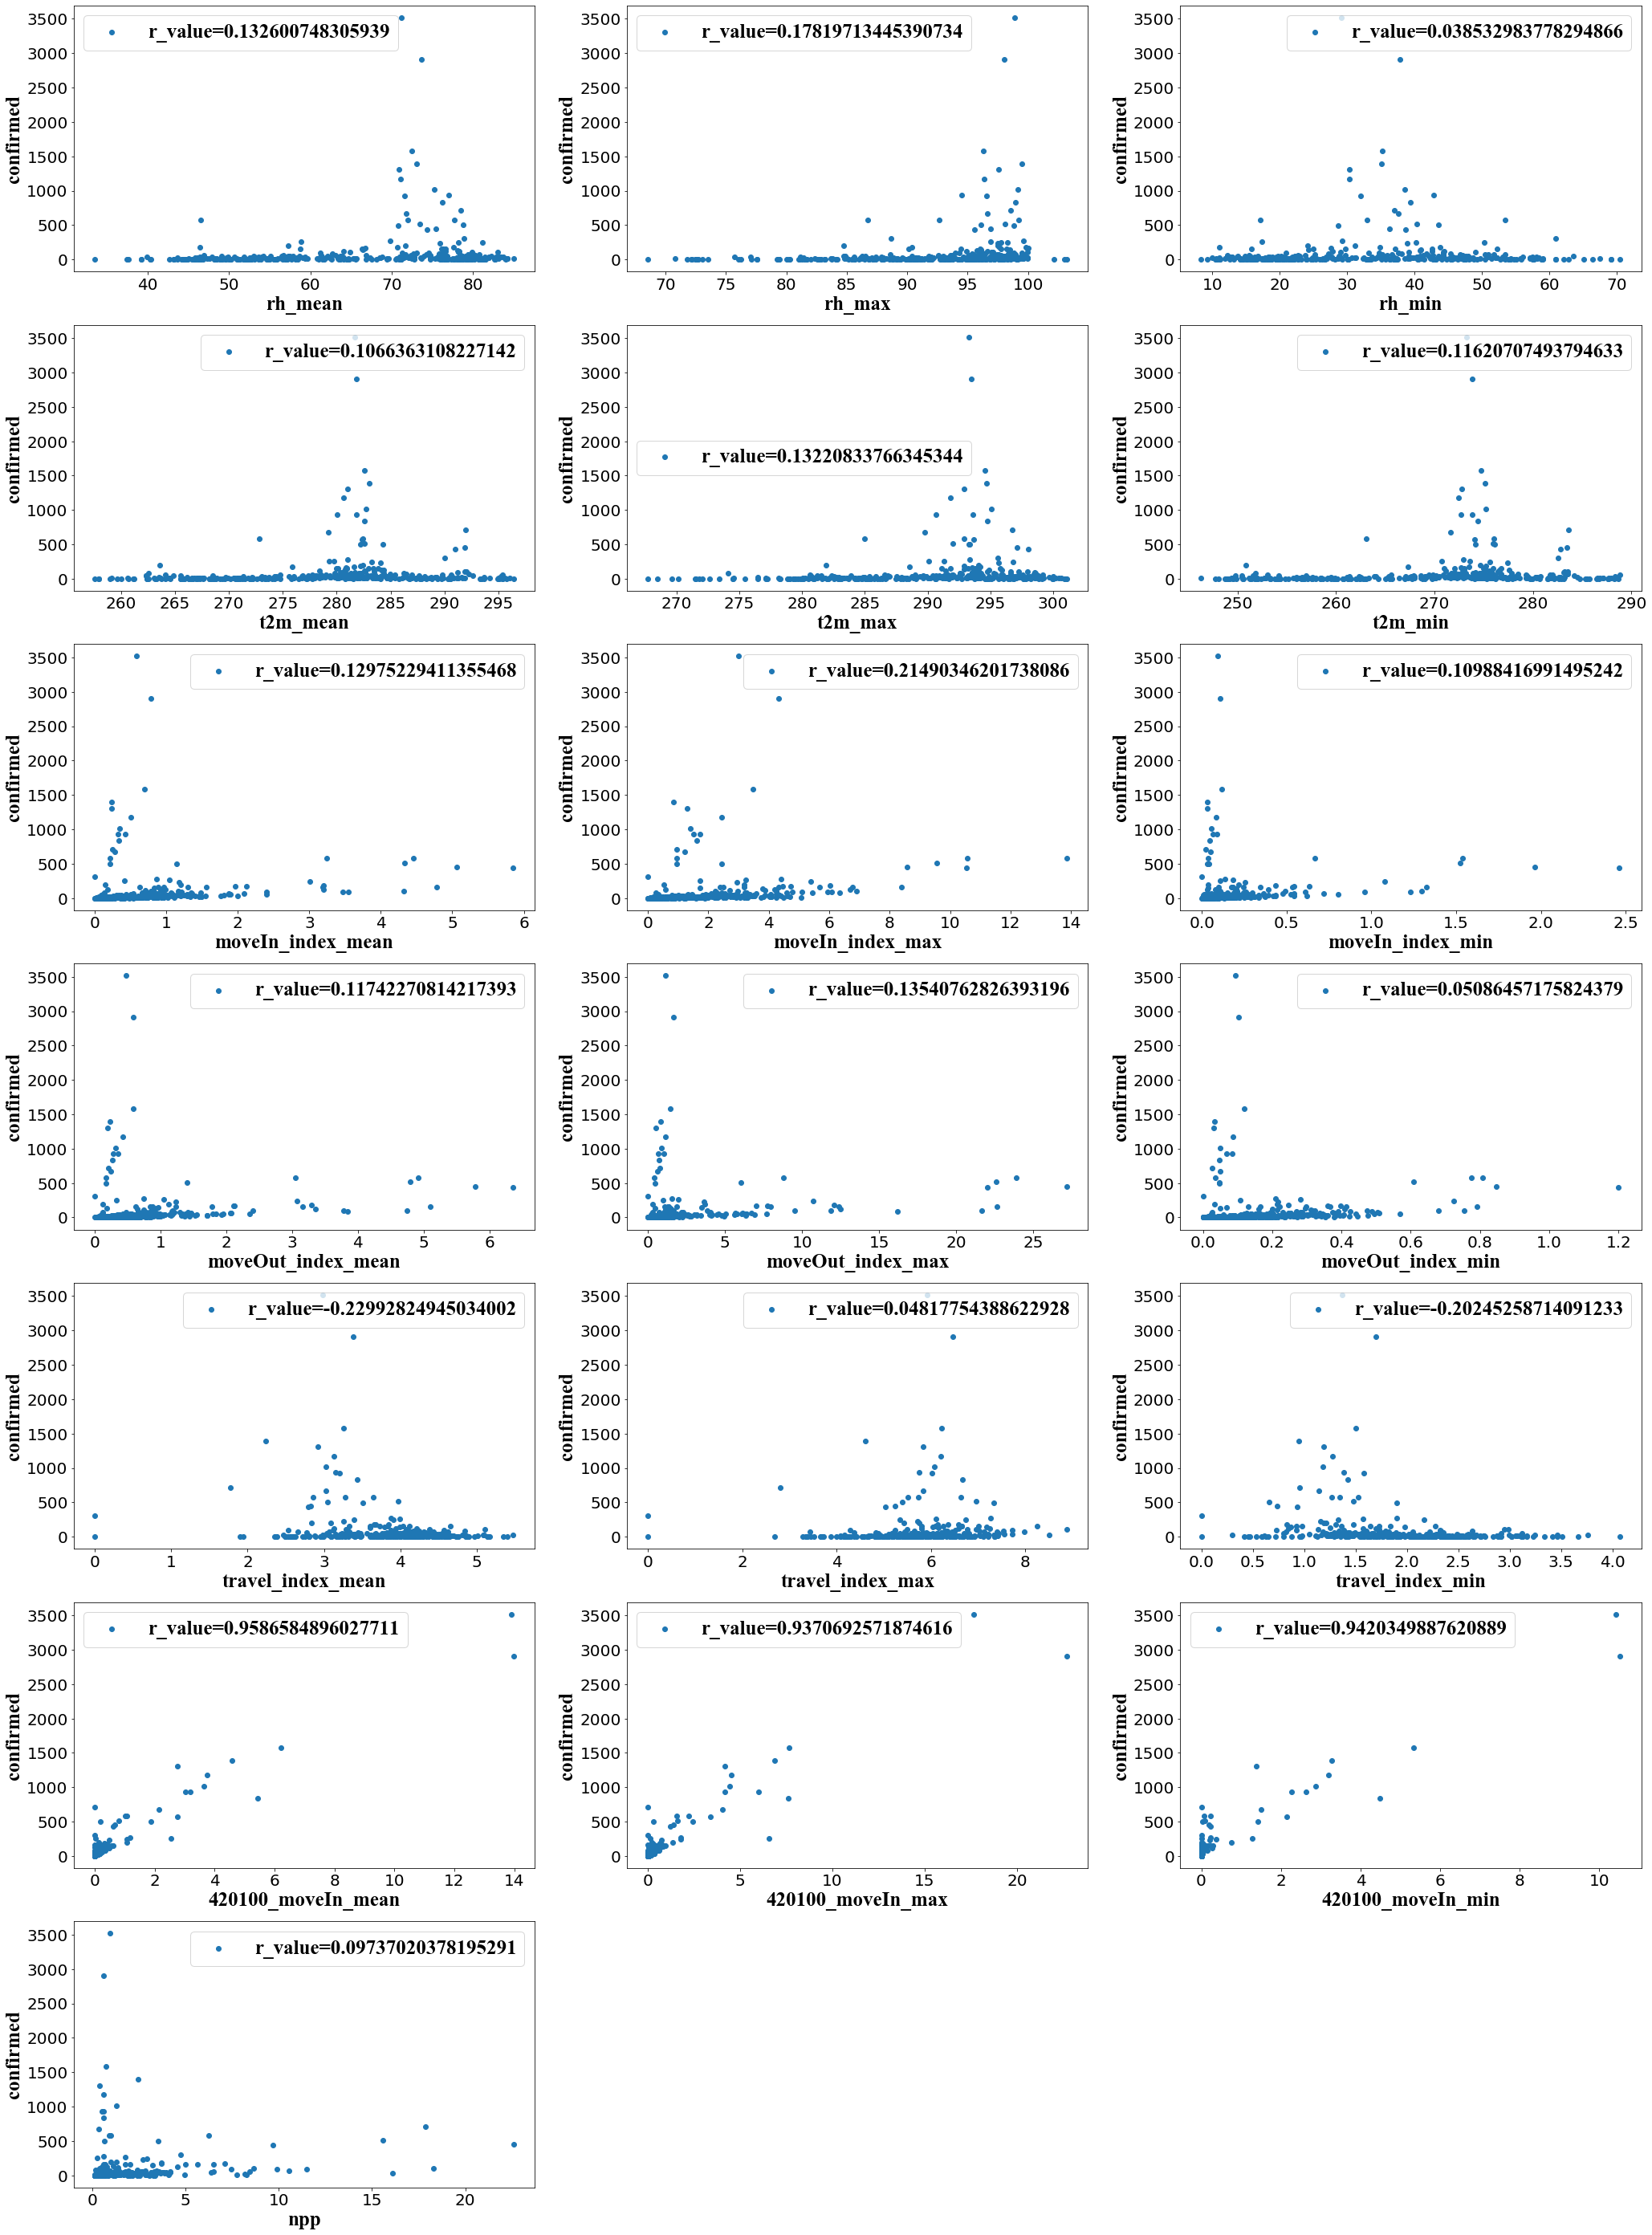

In [192]:
epidemicIds = [420100]
df = df[~df['id'].isin(epidemicIds)]
figsize = 35,50
plt.figure(figsize=figsize)
for i in range(len(feature)):
    plt.subplot(7,3,1+i)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[feature[i]], df['confirmed'])
    plt.scatter(df[feature[i]], df['confirmed'], label='r_value=' + str(r_value))
    plt.xlabel(feature[i], font1)
    plt.ylabel('confirmed', font1)
    plt.legend(prop=font1)  # 图例
    plt.tick_params(labelsize=20)